In [1]:
import struct
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors


### support by the teachers

In [2]:
input_filename="elevation1x1_new-mer-bleue.bmp"

bmp = open(input_filename, 'rb') # open a binary file
print('-- First part of the header, information about the file (14 bytes)')
print('Type:', bmp.read(2).decode())
print('Size: %s' % struct.unpack('I', bmp.read(4)))
print('Reserved 1: %s' % struct.unpack('H', bmp.read(2)))
print('Reserved 2: %s' % struct.unpack('H', bmp.read(2)))
offset=struct.unpack('I', bmp.read(4))
print('Image start after Offset: %s' % offset)

print('-- Second part of the header, DIB header, bitmap information header (varying size)')
print('The size of this DIB Header Size: %s' % struct.unpack('I', bmp.read(4)))
print('Width: %s' % struct.unpack('I', bmp.read(4)))
print('Height: %s' % struct.unpack('I', bmp.read(4)))
print('Colour Planes: %s' % struct.unpack('H', bmp.read(2)))
pixel_size=struct.unpack('H', bmp.read(2))
print('Bits per Pixel: %s' % pixel_size)
print('Compression Method: %s' % struct.unpack('I', bmp.read(4)))
print('Raw Image Size: %s' % struct.unpack('I', bmp.read(4)))
print('Horizontal Resolution: %s' % struct.unpack('I', bmp.read(4)))
print('Vertical Resolution: %s' % struct.unpack('I', bmp.read(4)))
print('Number of Colours: %s' % struct.unpack('I', bmp.read(4)))
print('Important Colours: %s' % struct.unpack('I', bmp.read(4)))

-- First part of the header, information about the file (14 bytes)
Type: BM
Size: 62506760
Reserved 1: 0
Reserved 2: 0
Image start after Offset: 54
-- Second part of the header, DIB header, bitmap information header (varying size)
The size of this DIB Header Size: 40
Width: 4901
Height: 4251
Colour Planes: 1
Bits per Pixel: 24
Compression Method: 0
Raw Image Size: 62506706
Horizontal Resolution: 2834
Vertical Resolution: 2834
Number of Colours: 0
Important Colours: 0


### read image

4830
3510
Nb of different colors: 32


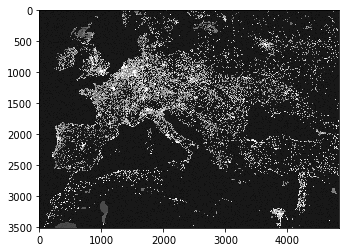

In [3]:
img_P = Image.open('/homes/r18qu/Bureau/L/S2/elu510/moi/challenge_3/population-density-map.bmp')
plt.imshow(img_P)
width1=img_P.size[0]
heigth1=img_P.size[1]
print(width1)
print(heigth1)
colors1 = img_P.getcolors(width1*heigth1)
colors1
print('Nb of different colors: %d' % len(colors1))
img_p = np.array(img_P)

4830
3510
Nb of different colors: 16567


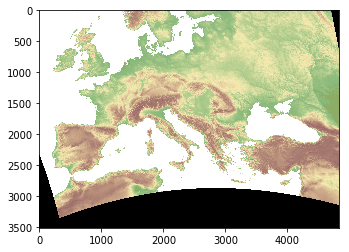

In [4]:
img_A = Image.open('/homes/r18qu/Bureau/L/S2/elu510/moi/challenge_3/resultNB.bmp')
plt.imshow(img_A)
width=img_A.size[0]
heigth=img_A.size[1]
print(width)
print(heigth)
colors = img_A.getcolors(width*heigth)
colors
print('Nb of different colors: %d' % len(colors))

In [5]:
#p=plt.imshow(img)
#plt.colorbar(img)

In [6]:
#img_src = img.convert('RGBA')
#plt.imshow(img_src)
#src_strlist = img_src.load()
#data = src_strlist[100, 100]

### print the RGB values for each pixel

In [7]:
by_color = defaultdict(int) #return a dic {(r,g,b):values}
for pixel in img_A.getdata():
    by_color[pixel] += 1
by_color

defaultdict(int,
            {(255, 255, 255): 4956255,
             (228, 238, 223): 18,
             (164, 200, 148): 23,
             (168, 203, 157): 100,
             (236, 242, 223): 7,
             (232, 241, 225): 22,
             (251, 253, 251): 530,
             (234, 243, 231): 127,
             (205, 225, 198): 97,
             (138, 185, 122): 177,
             (157, 196, 142): 37,
             (165, 200, 143): 12,
             (178, 208, 164): 18,
             (177, 208, 164): 29,
             (187, 213, 170): 14,
             (247, 250, 243): 25,
             (228, 238, 219): 18,
             (244, 248, 241): 85,
             (247, 250, 245): 177,
             (227, 238, 220): 30,
             (207, 225, 196): 9,
             (222, 229, 189): 1,
             (225, 219, 166): 1,
             (213, 212, 156): 21,
             (196, 207, 149): 9,
             (206, 212, 154): 22,
             (192, 211, 149): 44879,
             (232, 223, 167): 86,
             (228, 207,

In [8]:
all_colors=by_color.keys() #get the key of the dic;

colorlist = list() #return [(r,g,b)....]
for i in all_colors:
    colorlist.append(i)
#print(colorlist)


### convert rgb(0,255) to rgb(0,1)

In [9]:
convert = list()
for i in colorlist:
    t=list()
    for c in i:
        color_normalization=c/255
        #color=round(color_normalization,2)
        if(len(t)<=3):
            t.append(color_normalization)
    if(len(t)==3):
        n=tuple(t)
        convert.append(n)
#print(convert)
print(len(convert))

16567


In [10]:
import seaborn as sns
mycolorpoint_original=[[1/255,186/255,253/255],
              [141/255,172/255,102/255],
              [145/255,175/255,119/255],
              [161/255,195/255,134/255],
              [198/255,213/255,145/255],
              [213/255,221/255,161/255],
              [242/255,233/255,174/255],
              [233/255,211/255,164/255], 
              [203/255,161/255,136/255],
              [182/255,144/255,121/255],
              [173/255,128/255,122/255],
              [166/255,122/255,113/255],
              [159/255,101/255,100/255]]
#select some main rgb values(blue,green,light yellow,dark yellow,brown) to make a color palette


In [11]:
mycolorpoint=list()#the data is copied from matlab,which uses different format,too lazy too re-input it
mycolorpoint_original
for i in mycolorpoint_original:
    n=tuple(i)
    mycolorpoint.append(n)
print(mycolorpoint)

[(0.00392156862745098, 0.7294117647058823, 0.9921568627450981), (0.5529411764705883, 0.6745098039215687, 0.4), (0.5686274509803921, 0.6862745098039216, 0.4666666666666667), (0.6313725490196078, 0.7647058823529411, 0.5254901960784314), (0.7764705882352941, 0.8352941176470589, 0.5686274509803921), (0.8352941176470589, 0.8666666666666667, 0.6313725490196078), (0.9490196078431372, 0.9137254901960784, 0.6823529411764706), (0.9137254901960784, 0.8274509803921568, 0.6431372549019608), (0.796078431372549, 0.6313725490196078, 0.5333333333333333), (0.7137254901960784, 0.5647058823529412, 0.4745098039215686), (0.6784313725490196, 0.5019607843137255, 0.47843137254901963), (0.6509803921568628, 0.47843137254901963, 0.44313725490196076), (0.6235294117647059, 0.396078431372549, 0.39215686274509803)]


### the color palette

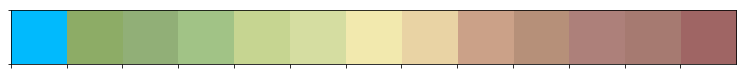

In [12]:
current_palette=sns.color_palette(mycolorpoint)
sns.palplot(current_palette)

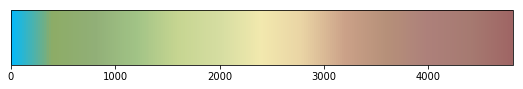

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(9, 1))
#fig.subplots_adjust(bottom=0.5)²

cmap = LinearSegmentedColormap.from_list(
         'gyb', mycolorpoint)
norm = mpl.colors.Normalize(vmin=0, vmax=4810)

colorbar1 = mpl.colorbar.ColorbarBase(ax, cmap,
                                norm=norm,
                                orientation='horizontal')

In [14]:
from pylab import *

cmaps = colorbar1.get_cmap()    # PiYG
rgb_colorbar=list()
for i in range(cmaps.N):
    rgb = cmaps(i)[:3] # will return rgba, we take only first 3 so we get rgb
    #print(matplotlib.colors.rgb2hex(rgb))
    rgb_colorbar.append(rgb)

    

In [15]:
#print(rgb_colorbar)
#print(len(rgb_colorbar))

In [16]:
gray = defaultdict(int)
for pixel in img_P.getdata():
    gray[pixel] += 1

In [17]:
popularity=np.array(img_P)
print(popularity.shape)
#popularity #read the information of certain pixel
t=popularity[1306][669]
q=popularity[2108][4426]
#plt.hist(gray.ravel())
#np.unique(gray)



(3510, 4830, 3)


In [18]:
#find rise and brest;x is row,y is column
mask = np.all(img_p == (0, 255, 0), axis=-1)
locationPixelBrest = np.transpose(np.where(mask))
print("Coordinates (y,x) of the green pixel (Rize): ", locationPixelBrest)
mask = np.all(img_p == (255, 0, 0), axis=-1)
locationPixelRize = np.transpose(np.where(mask))
print("Coordinates (y,x) of the red pixel (Brest): ", locationPixelRize)

Coordinates (y,x) of the green pixel (Rize):  [[2108 4426]]
Coordinates (y,x) of the red pixel (Brest):  [[1306  669]]


In [2]:
t= (1306/15,669/15)
t[88,45]
#we will start from this cell 

(87.06666666666666, 44.6)

In [20]:
#create a matrix to save the information for each cell
popularity_information=np.zeros((322, 234))

def current_popularity_information():
    for i in popularity_information:
        for j in popularity_information:
            popularity_information[i][j]=

SyntaxError: invalid syntax (<ipython-input-20-2d811afc6605>, line 7)

In [21]:
def find_posithion_in_map()
    

SyntaxError: invalid syntax (<ipython-input-21-f91b16222b3b>, line 1)

In [27]:
def surround(point):
    surround=[]
    x=point[0]   
    y=point[1] 
    temporay=[(x-1,y-1),(x-1,y),(x-1,y-1),(x,y-1),(x,y+1),(x+1,y-1),(x+1,y),(x+1,y+1)]
    for i in temporay:
        a=i[0]
        b=i[1]
        n=img_P[a][b]
        surround.append(n)
#input should be a certain position of point p[x][y]=>p(x,y)

TypeError: 'BmpImageFile' object does not support indexing

In [23]:

def surrounds():
    surround=[]
    temporay=[(x-1,y-1),(x-1,y),(x-1,y-1),(x,y-1),(x,y+1),(x+1,y-1),(x+1,y),(x+1,y+1)]
    for i in temporay:
        a=i[0]
        b=i[1]
        n=popularity[a][b]
        surround.append(n) ##有点问题；得读hum
    print(surround)
#input should be a certain position of point p[x][y]=>p(x,y)

SyntaxError: invalid syntax (<ipython-input-23-f98a8e82fd59>, line 2)

In [24]:
populationHumains={}
populationZombies={}

In [25]:
def the_humain_in_cell:
    

SyntaxError: invalid syntax (<ipython-input-25-f349366362a0>, line 1)

In [ ]:
def the_zombie_in_cell:
    